## Analysis of historical data

### Data
Source: EM-DAT, CRED / UCLouvain, Brussels, Belgium ; www.emdat.be (D. Guha-Sapir)

Version: 020-09-01

File creation: Sat, 12 Sep 2020 22:21:30 CEST

Table type: Custom request

Number of records: 24520

### Important Notes 

For a disaster to be entered into the EM-DAT database at least one of the following criteria must be fulfilled:

* Ten (10) or more people reported killed
* Hundred (100) or more people reported affected
* Declaration of a state of emergency
* Call for international assistance

source: https://www.emdat.be/explanatory-notes

⚠️ if we will use different databases, we must have common criteria 


### Packages:

In [1]:
import pandas as pd
import copy as copy

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

### Loading em-dat data 

In [2]:
# loading data
table = pd.read_excel("emdat_public_2020_09_12_query_uid-tAnKEX.xlsx", skiprows=6)
# Selecting floods
flood_table = table[table["Disaster Type"] == "Flood"]
flood_table

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
16,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,14.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
17,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
50,1911-0002-CHN,1911,2,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.652756
63,1915-0011-CHN,1915,11,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,NaN,NaN,NaN,3000000.0,NaN,3000000.0,NaN,NaN,NaN,3.965849
79,1917-0013-CHN,1917,13,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,NaN,NaN,NaN,635000.0,NaN,635000.0,NaN,NaN,NaN,5.022539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24509,2020-0168-YEM,2020,168,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,...,22.0,10.0,30.0,150000.0,NaN,150030.0,NaN,NaN,NaN,NaN
24510,2020-0216-YEM,2020,216,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,4.0,16.0,85.0,130.0,NaN,215.0,NaN,NaN,NaN,NaN
24511,2020-0319-YEM,2020,319,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,25.0,172.0,124.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN
24518,2020-0175-COD,2020,175,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,18.0,52.0,80.0,92500.0,NaN,92580.0,NaN,NaN,NaN,NaN


### Period

In [7]:
print("from", flood_table["Year"].min(), "to", flood_table["Year"].max())

from 1900 to 2020


### Types of floods 

The types of floods that are considered by EM-DAT are:
* Coastal flood	
* Riverine flood
* Flash flood
* Ice jam flood

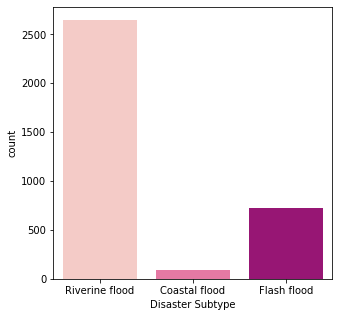

,Dis No
Disaster Subtype,
Coastal flood,85
Flash flood,719
Riverine flood,2647


In [108]:
# the types of floods that have occurred
plt.figure(figsize=(5, 5))
sns.countplot(x="Disaster Subtype", data=flood_table, palette="RdPu")
plt.show()
flood_table[["Disaster Subtype", "Dis No"]].groupby(by=["Disaster Subtype"]).count()

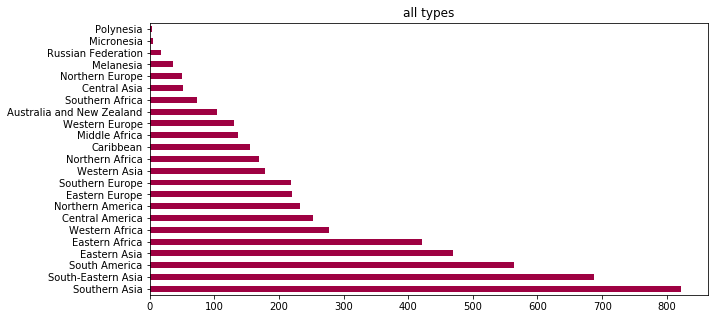

In [105]:
flood_table["Region"].value_counts().plot(
    kind="barh", figsize=(10, 5), cmap="Spectral", title="all types"
)

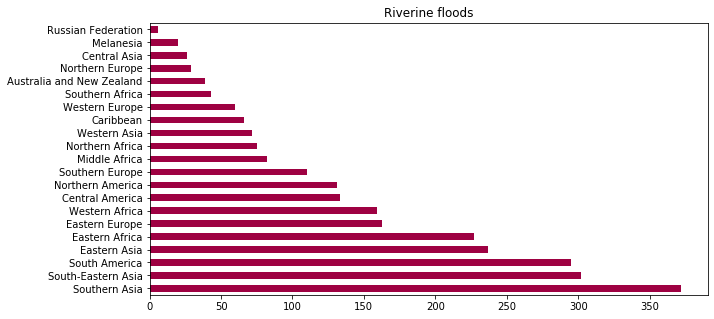

In [109]:
flood_table.loc[
    flood_table["Disaster Subtype"] == "Riverine flood", "Region"
].value_counts().plot(
    kind="barh", figsize=(10, 5), cmap="Spectral", title="Riverine floods"
)

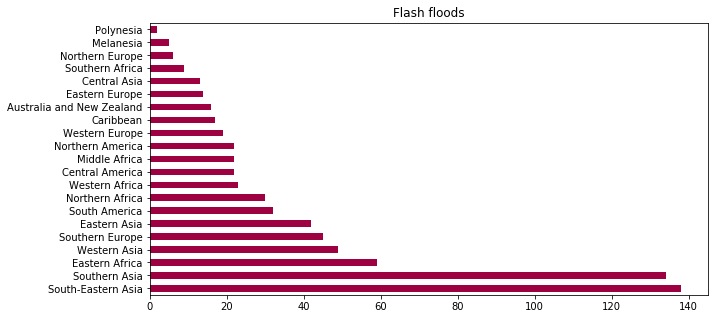

In [110]:
flood_table.loc[
    flood_table["Disaster Subtype"] == "Flash flood", "Region"
].value_counts().plot(
    kind="barh", figsize=(10, 5), cmap="Spectral", title="Flash floods"
)

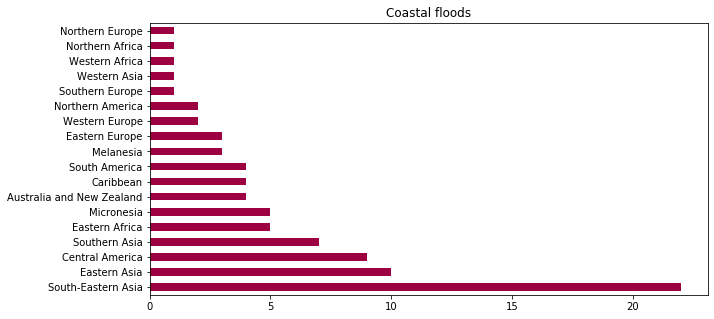

In [111]:
flood_table.loc[
    flood_table["Disaster Subtype"] == "Coastal flood", "Region"
].value_counts().plot(
    kind="barh", figsize=(10, 5), cmap="Spectral", title="Coastal floods"
)

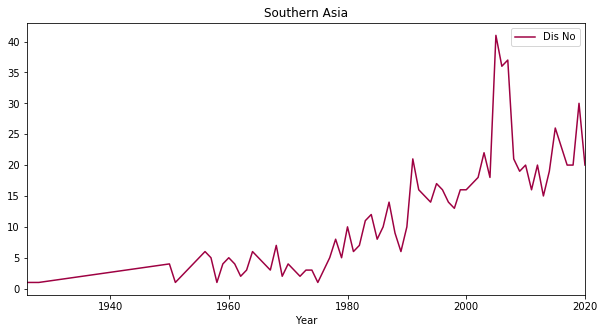

In [121]:
flood_table.loc[flood_table["Region"] == "Southern Asia", ["Year", "Dis No"]].groupby(
    by=["Year"]
).count().plot(figsize=(10, 5), cmap="Spectral", title="Southern Asia")

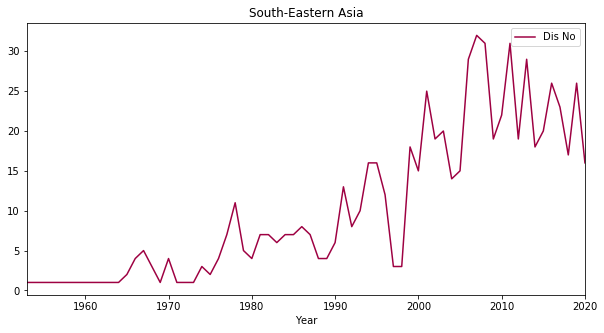

In [118]:
flood_table.loc[
    flood_table["Region"] == "South-Eastern Asia", ["Year", "Dis No"]
].groupby(by=["Year"]).count().plot(
    figsize=(10, 5), cmap="Spectral", title="South-Eastern Asia"
)

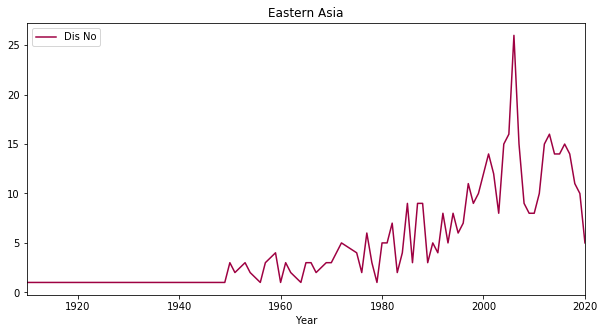

In [128]:
flood_table.loc[flood_table["Region"] == "Eastern Asia", ["Year", "Dis No"]].groupby(
    by=["Year"]
).count().plot(figsize=(10, 5), cmap="Spectral", title="Eastern Asia")

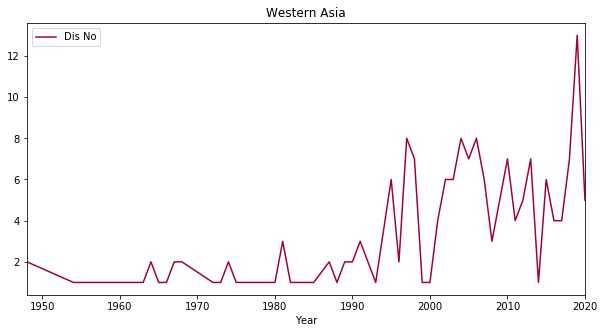

In [135]:
flood_table.loc[flood_table["Region"] == "Western Asia", ["Year", "Dis No"]].groupby(
    by=["Year"]
).count().plot(figsize=(10, 5), cmap="Spectral", title="Western Asia")

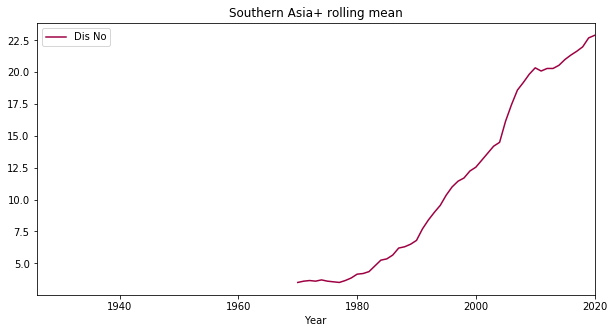

In [132]:
flood_table.loc[flood_table["Region"] == "Southern Asia", ["Year", "Dis No"]].groupby(
    by=["Year"]
).count().rolling(20).mean().plot(
    figsize=(10, 5), cmap="Spectral", title="Southern Asia+ rolling mean"
)

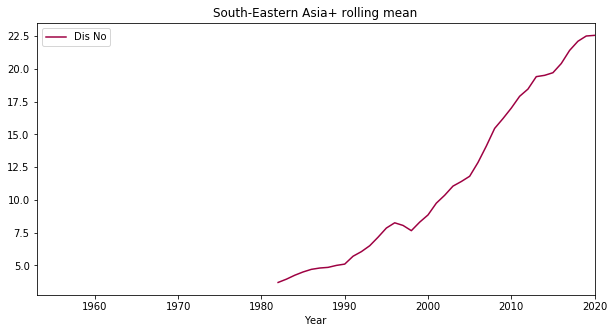

In [133]:
flood_table.loc[
    flood_table["Region"] == "South-Eastern Asia", ["Year", "Dis No"]
].groupby(by=["Year"]).count().rolling(20).mean().plot(
    figsize=(10, 5), cmap="Spectral", title="South-Eastern Asia+ rolling mean"
)

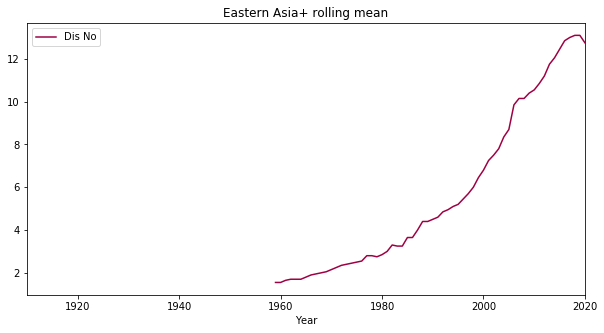

In [134]:
flood_table.loc[flood_table["Region"] == "Eastern Asia", ["Year", "Dis No"]].groupby(
    by=["Year"]
).count().rolling(20).mean().plot(
    figsize=(10, 5), cmap="Spectral", title="Eastern Asia+ rolling mean"
)

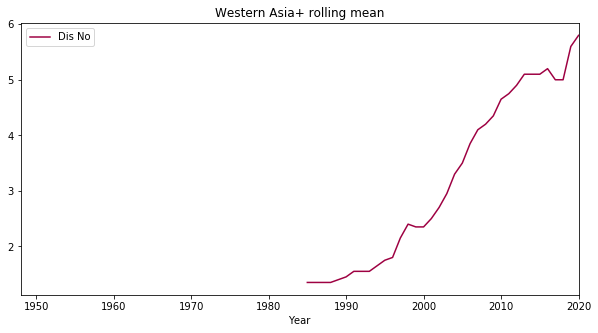

In [136]:
flood_table.loc[flood_table["Region"] == "Western Asia", ["Year", "Dis No"]].groupby(
    by=["Year"]
).count().rolling(20).mean().plot(
    figsize=(10, 5), cmap="Spectral", title="Western Asia+ rolling mean"
)